## This notebook is designed to be an active notebook for specifically comparing the differences between case networks and control networks - currnetly not very developed as focus has been on the validation of tractography pipeline 

The structure is likely to change, as it is currently designed to be an active exploratory notebook I will keep most comments inside of code cells 

In [1]:
# this cell imports the necessary packages - sets variables to point to string keys - sets the sub case and control
# dictionaries as well as creating lists of global node and othe metrics


import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pickle

# set variables that will point to dictionary keys - with the type/output will be in the dict, note these 
# are not based on the output of the analagous networkx function but how I have written into dict


#data/matrices
graph = "graph" #networkx graph basically dictionaries all the way down
data = "data" #pandas data frame 
bin_mat = "binary_matrix" #numpy array 
bin_df = "binary_df" # pandas data frame 
data_numpy = "data_as_numpy_array" #numpy array
norm_lap = "normalised_laplacian" #numpy array?

#global metrics 
gl_eff = "global_efficiency" #float
loc_eff = "local_efficiency" #float
clus_coef = "clusetering_coefficent" #float
ave_path_length = "ave_path_length" #float
clique_num = "clique_number" #int (poss float but always integer valued)
ass_coef = "assortativity_coefficient" #float
transitivity = "transitivity" #float
rich_club_coeff = "rich_club_coefficient" #currently not working would be float
sw_sigma = "" #currently not working would be float
sw_gamma = "" #currently not working would be float
ave_strength = "average_node_strength" #float
no_edges = "number_of_edges" #int
ave_deg = "average_degree" #int

#individual node/edge metrics and dicts
deg = "degree" #dictionary - nodes as key degree as values 
bet_cent = "betweenness_centrality" # dictionary - nodes as key betweeness as values 
edge_bet_cent = "edge_betweenness_centrality" # dictionary - edge tuple as key edgebetweeness centrality as values 
eigen_cent = "eigenvector_centrality" # dictionary - nodes as eigenvalue centrality as values 
deg_cent = "degree_centrality" # dictionary - nodes as key degree centrality as values 
strength = "node_strength"  # dictionary - nodes as key strength as values 

#other
deg_hist = "degree_histogram" #list - index is degree value is how many nodes with that degree 
norm_lap_spec = "normalised_laplacian_spectrum" #list of floats?


#subject dictionary with a list of runs - corresponds to how connectome file is saved for now hand written 
sub_dict = {"NENAH004" : ["orig", "run2"], "NENAH010" :  ["orig", "run2"], "NENAH011" :  ["orig", "run2"],
                "NENAH012" : ["orig", "run2"], "NENAH015" : ["orig", "run2"], "NENAH016" : ["orig", "run2"], 
                "NENAH022" : ["orig", "run2"], "NENAH024" : ["orig", "run2"], "NENAHC002" : ["orig", "run2", "run3"], 
                "NENAHC003" : ["orig", "run2","run3"], "NENAHC010" : ["orig", "run2", "run3"],
                "NENAHC013" : ["orig", "run2", "run3"], "NENAHC016" : ["orig", "run2", "run3"],
                "NENAHC018" : ["orig", "run2", "run3"], "NENAHC020": ["orig", "run2", "run3"],
                "NENAHC025" : ["orig", "run2"]
           }

case_dict = {"NENAH004" : ["orig", "run2"], "NENAH010" :  ["orig", "run2"], "NENAH011" :  ["orig", "run2"],
                "NENAH012" : ["orig", "run2"], "NENAH015" : ["orig", "run2"], "NENAH016" : ["orig", "run2"], 
                "NENAH022" : ["orig", "run2"], "NENAH024" : ["orig", "run2"]
            }

control_dict = { "NENAHC002" : ["orig", "run2", "run3"],  "NENAHC003" : ["orig", "run2", "run3"], 
                "NENAHC010" : ["orig", "run2", "run3"],"NENAHC013" : ["orig", "run2", "run3"],
                "NENAHC016" : ["orig", "run2", "run3"], "NENAHC018" : ["orig", "run2", "run3"],
                "NENAHC020": ["orig", "run2", "run3"], "NENAHC025" : ["orig", "run2",]
             }

#create the lists which might be usuefull in automating data frame creation
#note these should be strings
global_metrics = [gl_eff, loc_eff, clus_coef, ave_path_length, clique_num,
                  transitivity, ave_strength, no_edges, ave_deg] 

node_metrics = [deg, strength, bet_cent, eigen_cent, deg_cent]

other_metrics = [deg_hist, norm_lap_spec, edge_bet_cent,]



In [2]:
main_df = pd.read_csv('global_metrics.csv', index_col = 0)
control_df = pd.read_csv('global_metrics_control.csv', index_col = 0)
case_df = pd.read_csv('global_metrics_case.csv', index_col = 0)
print(main_df)
print(control_df)
print(case_df)

               global_efficiency  local_efficiency  clusetering_coefficent  \
sub-id                                                                       
NENAH004orig            0.793412          0.876942                0.753892   
NENAH004run2            0.794607          0.878639                0.757279   
NENAH010orig            0.859725          0.907628                0.815256   
NENAH010run2            0.858147          0.905623                0.811247   
NENAH011orig            0.786957          0.877841                0.755688   
NENAH011run2            0.790591          0.879621                0.759244   
NENAH012orig            0.823867          0.892446                0.784894   
NENAH012run2            0.827405          0.895809                0.791620   
NENAH015orig            0.838067          0.895427                0.790854   
NENAH015run2            0.834337          0.894719                0.789439   
NENAH016orig            0.832903          0.893083              

In [3]:
main_orig_df = main_df.filter(like='orig', axis= 0) 
case_orig_df = case_df.filter(like='orig', axis=0)
control_orig_df = control_df.filter(like='orig', axis=0)

In [4]:
control_orig_df.head(8)

,global_efficiency,local_efficiency,clusetering_coefficent,ave_path_length,clique_number,transitivity,average_node_strength,number_of_edges,average_degree
sub-id,,,,,,,,,
NENAHC002orig,0.823293,0.884391,0.768783,1.353414,27,0.741484,1.050543,2254,53.666667
NENAHC003orig,0.811245,0.880254,0.760507,1.377510,26,0.726907,0.960068,2170,51.666667
NENAHC010orig,0.858147,0.911751,0.823503,1.283706,35,0.797820,1.241569,2497,59.452381
NENAHC013orig,0.851262,0.902447,0.804893,1.297476,30,0.782544,1.420423,2449,58.309524
NENAHC016orig,0.818847,0.883093,0.766185,1.362306,28,0.733427,1.207368,2223,52.928571
NENAHC018orig,0.822146,0.886210,0.772419,1.355709,28,0.743553,1.166411,2246,53.476190
NENAHC020orig,0.841079,0.897292,0.794585,1.317843,34,0.770846,1.257441,2378,56.619048
NENAHC025orig,0.845095,0.897433,0.794866,1.309811,29,0.768601,1.200440,2406,57.285714


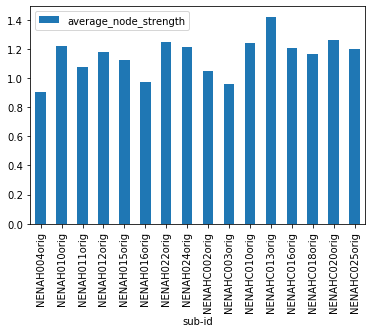

In [12]:
main_orig_df.plot.bar(y = "average_node_strength")
plt.show()

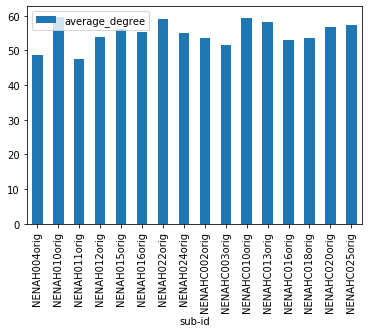

In [13]:
main_orig_df.plot.bar(y = "average_degree")

In [18]:
case_orig_df.describe()

,global_efficiency,local_efficiency,clusetering_coefficent,ave_path_length,clique_number,transitivity,average_node_strength,number_of_edges,average_degree
count,8.000000,8.000000,8.000000,8.000000,8.0000,8.000000,8.000000,8.000000,8.000000
mean,0.827961,0.893283,0.786567,1.344127,29.0000,0.753984,1.117252,2286.625000,54.443452
std,0.026359,0.011484,0.022965,0.052796,2.9277,0.031563,0.124044,183.636238,4.372291
min,0.786957,0.876942,0.753892,1.280551,25.0000,0.705985,0.905938,2001.000000,47.642857
25%,0.816253,0.888795,0.777592,1.314616,27.2500,0.740189,1.049049,2205.000000,52.500000
50%,0.832544,0.894240,0.788479,1.334911,29.0000,0.757284,1.149708,2318.500000,55.202381
75%,0.842692,0.898445,0.796889,1.367542,32.0000,0.772151,1.216481,2389.250000,56.886905
max,0.859725,0.907628,0.815256,1.426277,32.0000,0.792585,1.247574,2508.000000,59.714286


In [19]:
control_orig_df.describe()

,global_efficiency,local_efficiency,clusetering_coefficent,ave_path_length,clique_number,transitivity,average_node_strength,number_of_edges,average_degree
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.833889,0.892859,0.785718,1.332222,29.625000,0.758148,1.188033,2327.875000,55.425595
std,0.017141,0.011082,0.022163,0.034282,3.248626,0.025404,0.138128,119.507845,2.845425
min,0.811245,0.880254,0.760507,1.283706,26.000000,0.726907,0.960068,2170.000000,51.666667
25%,0.821321,0.884067,0.768133,1.306727,27.750000,0.739470,1.137444,2240.250000,53.339286
50%,0.832186,0.891751,0.783502,1.335628,28.500000,0.756077,1.203904,2316.000000,55.142857
75%,0.846637,0.898686,0.797373,1.357358,31.000000,0.773771,1.245537,2416.750000,57.541667
max,0.858147,0.911751,0.823503,1.377510,35.000000,0.797820,1.420423,2497.000000,59.452381
